#### 2023/11/08 すべての2値化ストローク画像を作成する

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from preprocess_data_plusinfo import PreprocessDataPlusInfo

In [2]:
info_0_180 = pd.read_excel('../data/direction_0_and_180.xlsx')
info_90_270 = pd.read_excel('../data/direction_90_and_270.xlsx')

In [3]:
 # 2値化されたストロークを描画
CANVAS_HEIGHT = 297
CANVAS_WIDTH = 420
NORM_DIVISOR = 3
BIN_HEIGHT = 420
BIN_WIDTH = 420
def draw_binstroke(df_input, stroke_cnt):
    df = df_input[stroke_cnt:stroke_cnt+1]
    # drawing info
    year = df['year'][stroke_cnt]
    month = df['month'][stroke_cnt]
    day = df['day'][stroke_cnt]
    motif = df['motif'][stroke_cnt]
    times = df['times'][stroke_cnt]
    name = df['name'][stroke_cnt]
    stroke_id = df['stroke_id'][stroke_cnt]
    shape_int = df['shape_int'][stroke_cnt]
    
    # 線種の判定処理
    if shape_int == 0:
        shape_str = 'point'
    elif shape_int == 1:
        shape_str = 'straight'
    elif shape_int == 2:
        shape_str = 'curve'
    elif shape_int == 3:
        shape_str = 'complex'
    elif shape_int == 4:
        shape_str = 'hatching'

    SCALE = 0.05
    plt.rcParams['font.family'] = 'Times New Roman'
    STROKE_COLOR = '#B9FF00'
    FACE_COLOR = '#2C0251'
    FIG_SIZE = (BIN_WIDTH / NORM_DIVISOR*SCALE, BIN_HEIGHT / NORM_DIVISOR*SCALE)
    fig, ax = plt.subplots(facecolor=FACE_COLOR, figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, 
                    bottom=False, left=False, right=False, top=False)
    ax.set_xlim([0, BIN_WIDTH / NORM_DIVISOR])    # x方向の描画範囲を指定
    ax.set_ylim([0, BIN_HEIGHT / NORM_DIVISOR])    # y方向の描画範囲を指定
    ax.set_facecolor(FACE_COLOR)
    ax.invert_yaxis()
    
    for px_grid in df[f'{int(BIN_WIDTH / NORM_DIVISOR)}*{int(BIN_HEIGHT / NORM_DIVISOR)}_img']:
        for x in range(int(BIN_HEIGHT / NORM_DIVISOR)):
            for y in range(int(BIN_HEIGHT / NORM_DIVISOR)):
                if px_grid[y, x] == 1:
                    r = patches.Rectangle(xy=(x, y), width=1, height=1, fc=STROKE_COLOR, ec=STROKE_COLOR, fill=True)
                    ax.add_patch(r)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    # plt.show()
    plt.savefig(f'../temp/20231008_allstrokeimage/{year}_{month}_{day}_{motif}_{times}_{name}_{stroke_id}_{shape_str}.jpg')
    plt.close()

In [5]:
# 2013年度
info_2013_0180 = info_0_180[info_0_180['year'] == 2013]
info_2013_90270 = info_90_270[info_90_270['year'] == 2013]

url_a = ['http://skill.shinshu-u.ac.jp/2013/4-18/20130417140951_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/5-13/20130513140841_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/5-27/20130527135304_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/6-10/20130610135043_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/6-24/20130624135832_18-4-0-0-0_strokes.txt/strokes/pointlists',         
         'http://skill.shinshu-u.ac.jp/2013/7-9/20130709145156_18-4-0-0-0_strokes.txt/strokes/pointlists']
rotate_type_a = [180, 0, 0, 90, 180, 0]

url_b = ['http://skill.shinshu-u.ac.jp/2013/4-18/20130417141022_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/5-13/20130513113848_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/5-27/20130527122833_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/6-10/20130610115808_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/6-24/20130624115420_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2013/7-9/20130709145729_18-4-0-0-0_strokes.txt/strokes/pointlists']

rotate_type_b = [0, 180, 0, 90, 270, 180]

url_c = ['http://skill.shinshu-u.ac.jp/2015/4-16/20150416145732_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2015/4-27/20150427114455_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2015/5-15/20150515161811_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2015/5-29/20150529155148_18-4-0-0-0_strokes.txt/strokes/pointlists',
         'http://skill.shinshu-u.ac.jp/2015/6-12/20150612161428_18-4-0-0-0_strokes.txt/strokes/pointlists']

rotate_type_c = [180, 180, 0, 0, 0]

data_a = [PreprocessDataPlusInfo(url, r) for url, r in zip(url_a, rotate_type_a)]
data_b = [PreprocessDataPlusInfo(url, r) for url, r in zip(url_b, rotate_type_b)]
data_c = [PreprocessDataPlusInfo(url, r) for url, r in zip(url_c, rotate_type_c)]

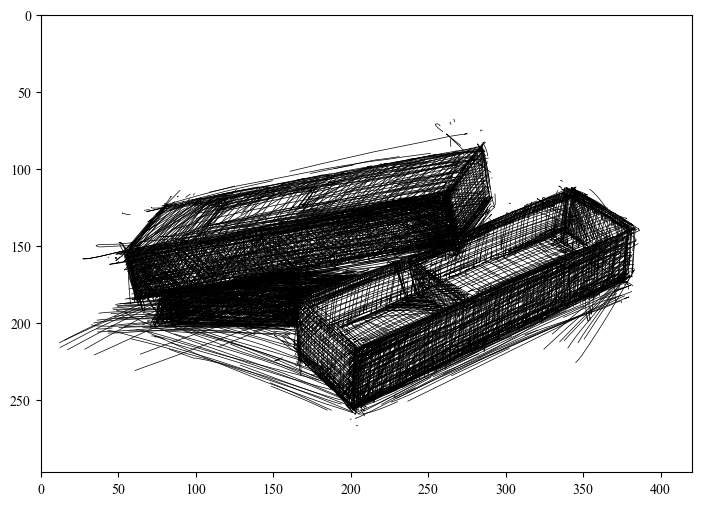

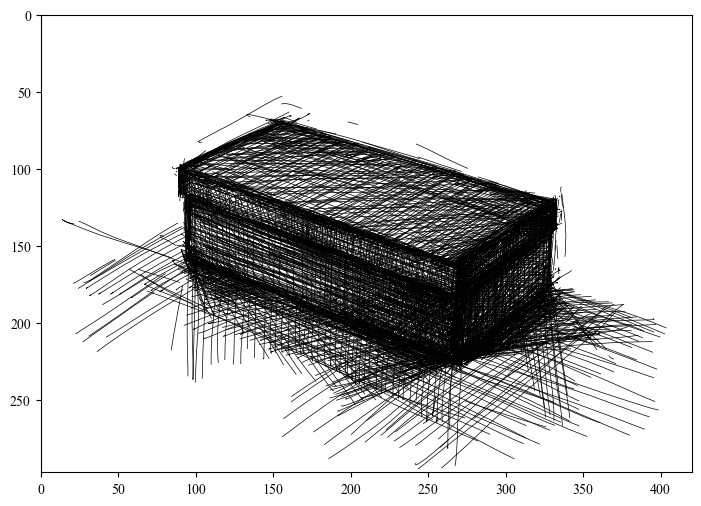

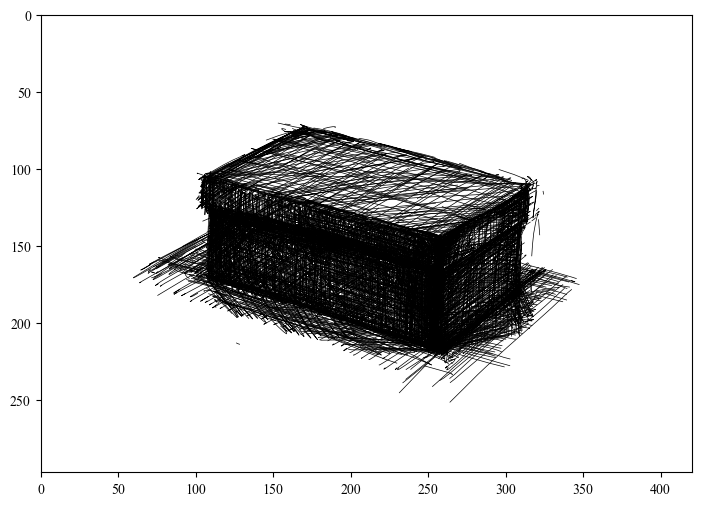

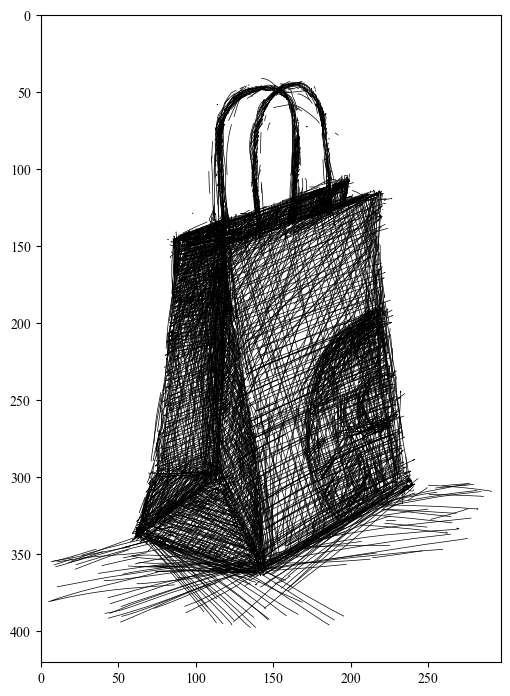

In [4]:
url_saito = ['http://skill.shinshu-u.ac.jp/w3kbko/5nur0x/strokes/pointlists',
            'http://skill.shinshu-u.ac.jp/i0zjtz/paper_bag_expert/20180215013255_18-4-0-0-0_strokes.txt/strokes/pointlists',
            'http://skill.shinshu-u.ac.jp/i0zjtz/paper_bag_expert/20211130185130_18-4-0-0-0_strokes.txt/strokes/pointlists',
            'http://skill.shinshu-u.ac.jp/w3kbko/nppqej/strokes/pointlists']

rotate_type_saito = [0, 0, 0, 90]

data_saito = [PreprocessDataPlusInfo(url, r) for url, r in zip(url_saito, rotate_type_saito)]

for data in data_saito:
    data.draw_allstroke()

In [6]:
for data in data_saito[3:4]:
    for i in range(len(data.df_addinfo)):
        print(i, ' / ', len(data.df_addinfo))
        draw_binstroke(data.df_addinfo, i)
    print('------- fin -------')

0  /  3018
1  /  3018
2  /  3018
3  /  3018
4  /  3018
5  /  3018
6  /  3018
7  /  3018
8  /  3018
9  /  3018
10  /  3018
11  /  3018
12  /  3018
13  /  3018
14  /  3018
15  /  3018
16  /  3018
17  /  3018
18  /  3018
19  /  3018
20  /  3018
21  /  3018
22  /  3018
23  /  3018
24  /  3018
25  /  3018
26  /  3018
27  /  3018
28  /  3018
29  /  3018
30  /  3018
31  /  3018
32  /  3018
33  /  3018
34  /  3018
35  /  3018
36  /  3018
37  /  3018
38  /  3018
39  /  3018
40  /  3018
41  /  3018
42  /  3018
43  /  3018
44  /  3018
45  /  3018
46  /  3018
47  /  3018
48  /  3018
49  /  3018
50  /  3018
51  /  3018
52  /  3018
53  /  3018
54  /  3018
55  /  3018
56  /  3018
57  /  3018
58  /  3018
59  /  3018
60  /  3018
61  /  3018
62  /  3018
63  /  3018
64  /  3018
65  /  3018
66  /  3018
67  /  3018
68  /  3018
69  /  3018
70  /  3018
71  /  3018
72  /  3018
73  /  3018
74  /  3018
75  /  3018
76  /  3018
77  /  3018
78  /  3018
79  /  3018
80  /  3018
81  /  3018
82  /  3018
83  /  3018
84

In [5]:
for d in data_saito:
    print(len(d.df_addinfo))

3353
2721
1988
3018


--- box1 ---


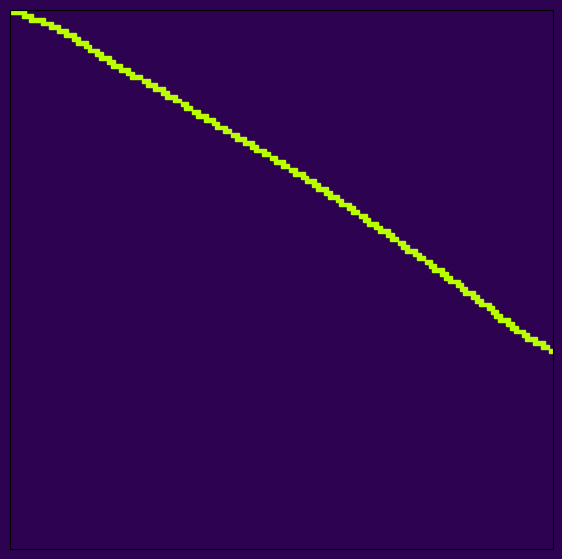

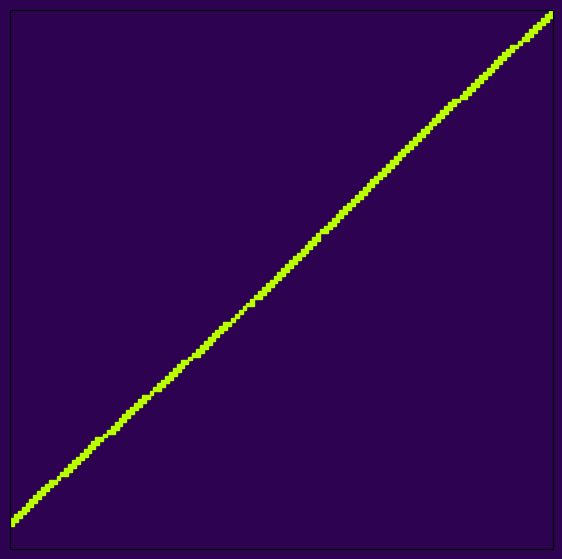

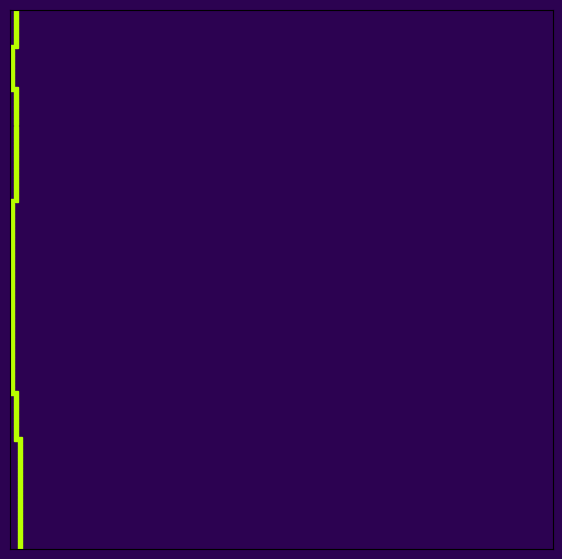

--- box2 ---


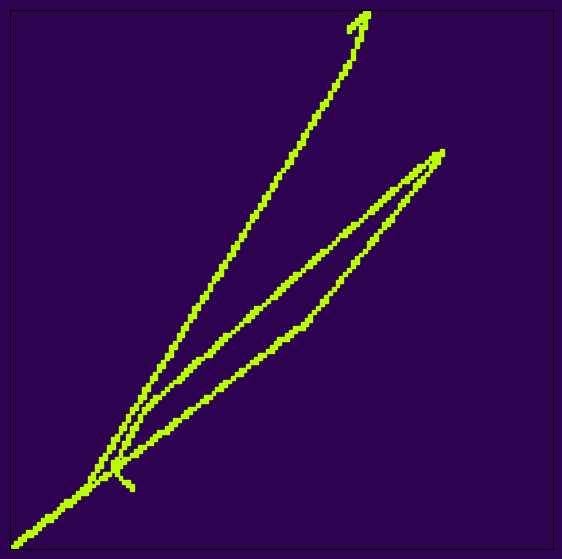

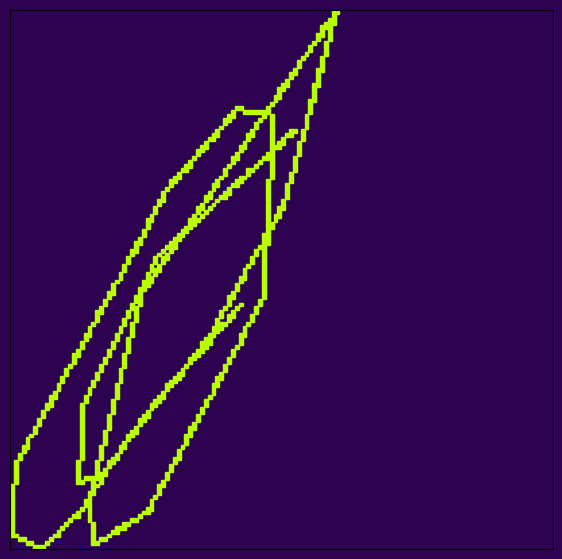

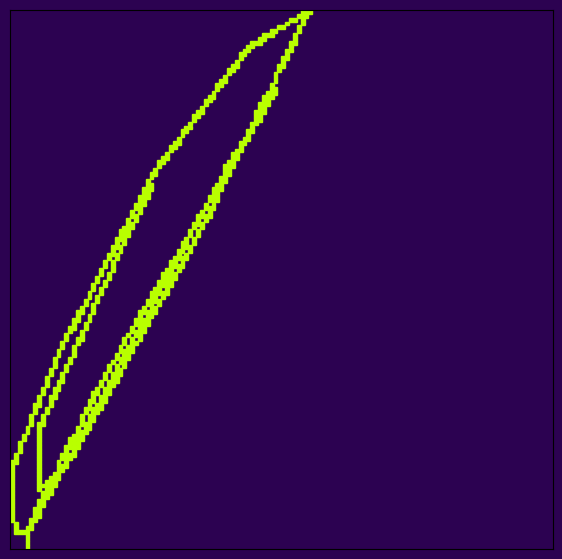

--- box3 ---


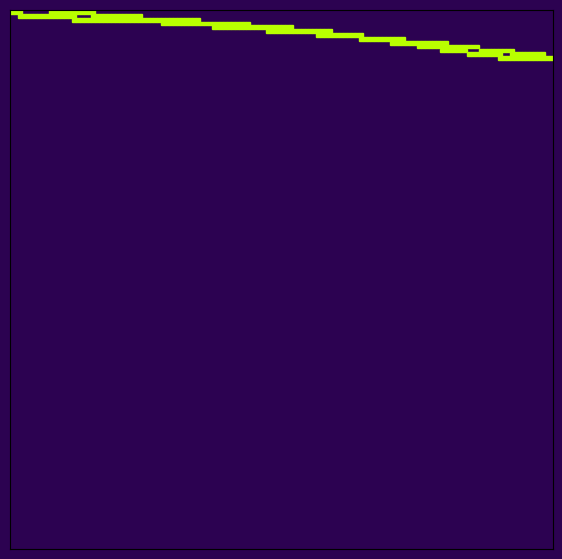

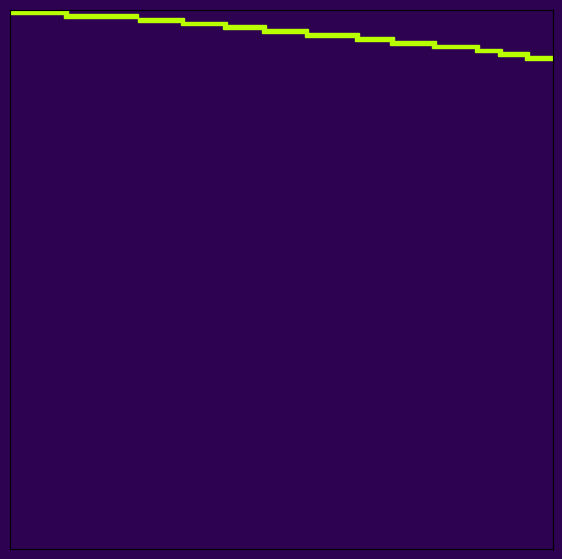

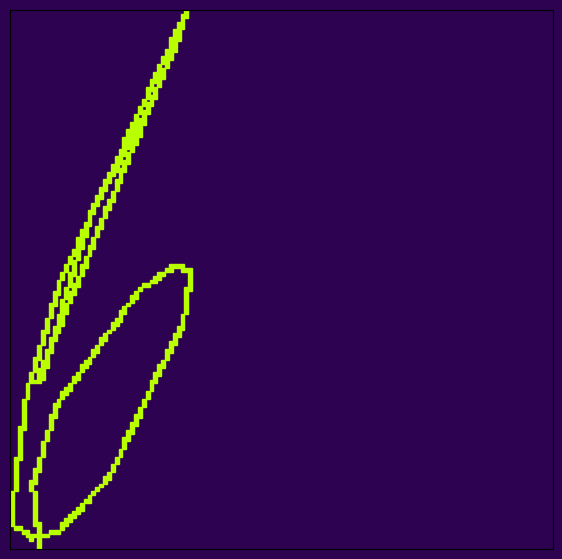

--- bag1 ---


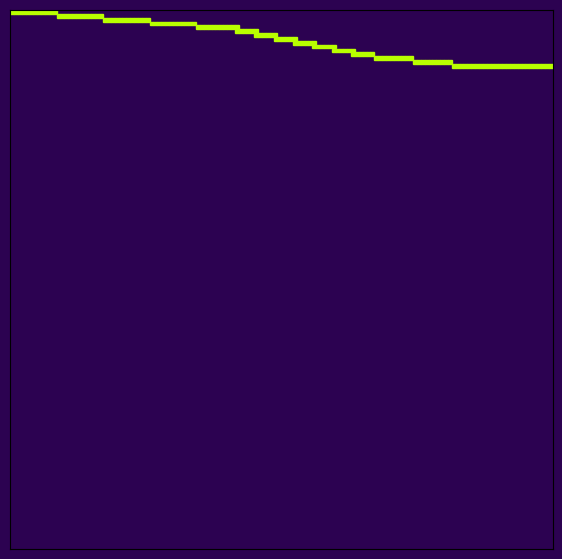

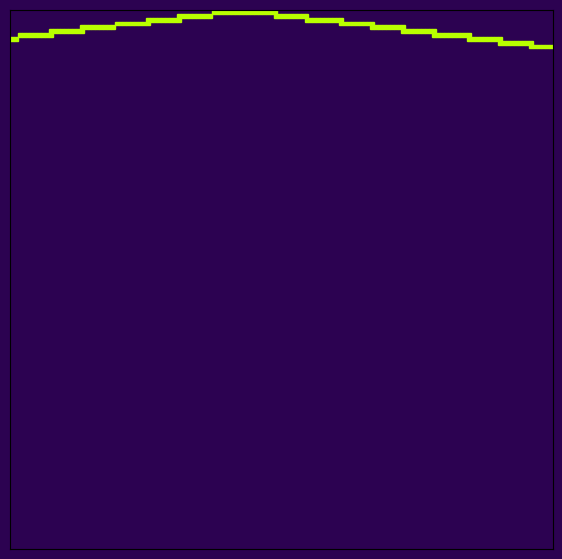

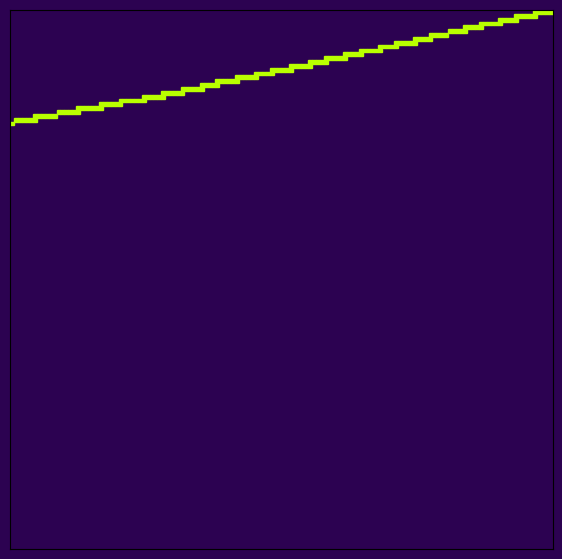

--- bag2 ---


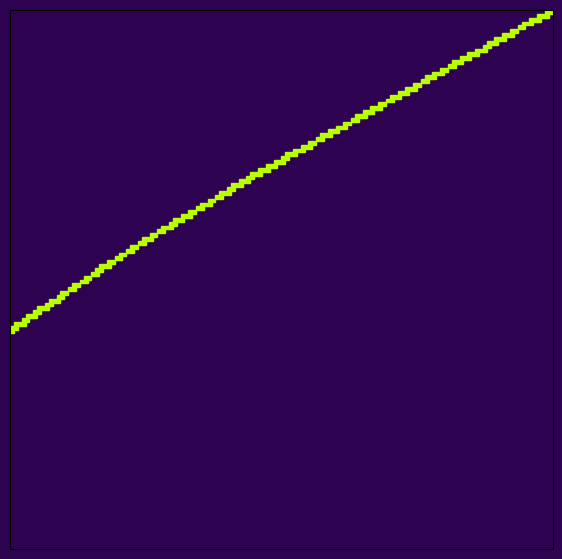

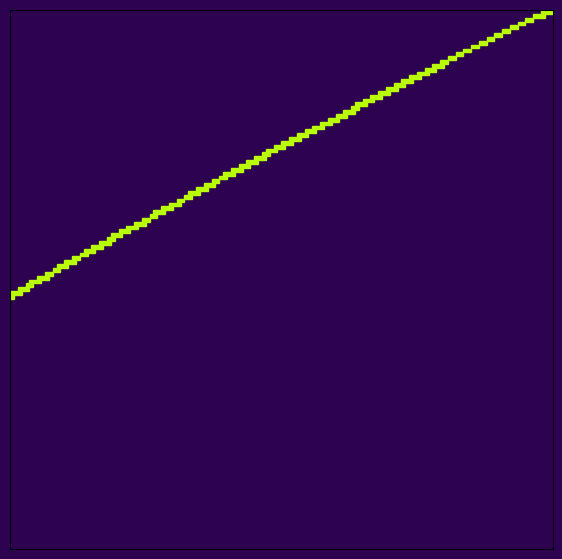

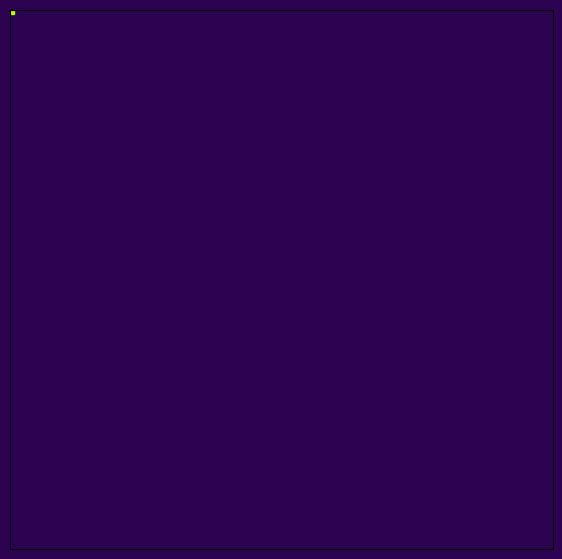

--- bag3 ---


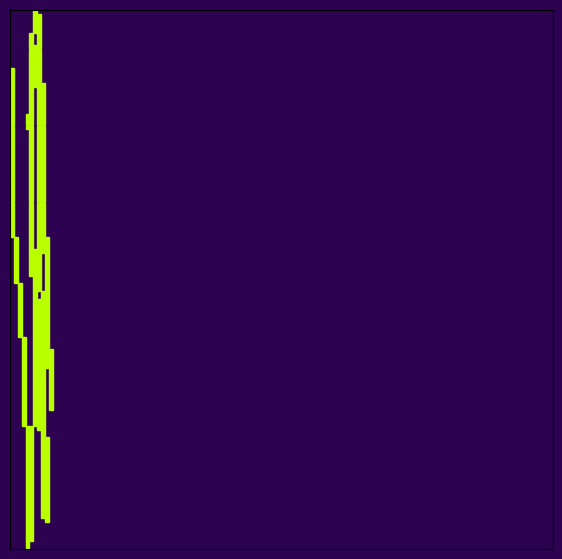

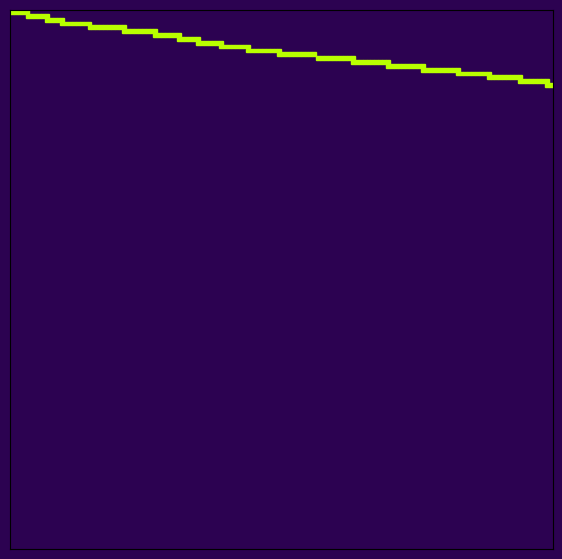

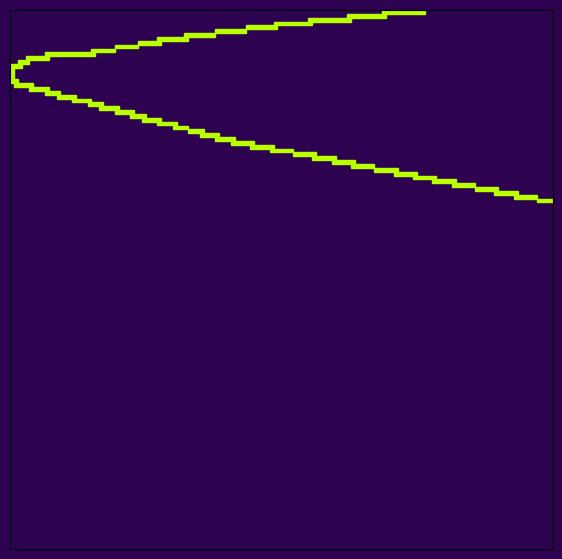

In [7]:
print('--- box1 ---')
for i in range(3):
    data_a[0].draw_binstroke(i)
print('--- box2 ---')
for i in range(3):
    data_a[1].draw_binstroke(i)
print('--- box3 ---')
for i in range(3):
    data_a[2].draw_binstroke(i)
print('--- bag1 ---')
for i in range(3):
    data_a[3].draw_binstroke(i)
print('--- bag2 ---')
for i in range(3):
    data_a[4].draw_binstroke(i)
print('--- bag3 ---')
for i in range(3):
    data_a[5].draw_binstroke(i)